<a href="https://colab.research.google.com/github/dlskawns/coz-project/blob/main/GM_%ED%98%91%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경설정

### 한글화를 위한 설정

In [ ]:
## 실행 후 런타임 반드시 재실행
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# 나눔폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

### 메캅 설정

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Rea

In [3]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [4]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   434k      0  0:00:03  0:00:03 --:--:--  791k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

### 데이터 불러오기

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AIB  Lab Seminar 데이터 전달 - AIB 13기.csv')

### 폰트 설정

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import font_manager,rc
import warnings

font_list = fm.findSystemFonts()
font_path= '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
warnings.simplefilter(action='ignore', category=FutureWarning)
fm._rebuild()


# EDA (자소서 only)

In [6]:
#데이터 길이
len(df)

989

In [8]:
# 결측치 개수
print(f"자소서 내용없는 사람: {len(df[df['자소서'].isnull()])}명")

자소서 내용없는 사람: 598명


In [8]:
# 자소서 길이 항목 생성
df['자소서길이'] = df['자소서'].map(lambda x: 0 if type(x) == float else len(x))

# 자소서 내용 없는 경우 공백 채우기
df['자소서'] = df['자소서'].map(lambda x: '' if type(x) == float else x)
df.head(3)

,applyingStatus,심사결과,마지막 단계,성별,거주지역,최종학력,학업상태,잔여학점,전공계열,전공,...,관련교육 경험,교육경험 기간,교육기간,채용프로세스 경험시점,취업적합성 점수,학습적합성 점수,HPC점수,사전과제 점수,자소서,자소서길이
0,submitted,합격,HRD-Net 신청 확인,남성,경기도,대학교 졸업,NaN,NaN,공학계열,컴퓨터공학,...,없음,NaN,NaN,6개월 이상,57.0,156.0,4.5,14.0,저는 E커머스 시장에 관심을 가지고 사업을 준비했었습니다. 하지만 데이터를 다룰줄 ...,402
1,submitted,합격,HRD-Net 신청 확인,남성,부산광역시,대학원 졸업,NaN,NaN,공학계열,로봇공학전공,...,없음,NaN,NaN,3개월 이내,50.0,158.0,4.5,15.0,1. AI에 관심을 가지게 된 계기\n\n1). 기계공학 / 마이크로 로봇 전공. ...,2543
2,submitted,합격,HRD-Net 신청 확인,남성,경기도,대학원 졸업,NaN,NaN,공학계열,소프트웨어학,...,있음,대학전공,1년 이상,3개월 이내,75.0,177.0,8.5,17.0,군 복무 시절 빅데이터와 관련된 도서를 접하고 나서 데이터 분석 분야에 관심이 생겨...,626


#### 자소서 길이

In [23]:
print('평균 자소서 길이(공백포함)',np.mean(df['자소서길이']))
print('최소 자소서 길이(공백포함)',np.min(df[df['자소서길이']>1]['자소서길이']))
print('최대 자소서 길이(공백포함)',np.max(df['자소서길이']))

평균 자소서 길이(공백포함) 293.85439838220424
최소 자소서 길이(공백포함) 6
최대 자소서 길이(공백포함) 8946


#### 자소서 내 이름 언급자

In [27]:
# ###이 있는 경우 발견 -> 자소서에 이름을 적은 경우...
print(f"###으로 이름을 언급한 사람 수: {len(df[df['자소서'].str.contains('###')])}")
print(f"###으로 이름을 언급한 사람 전체 비중: {len(df[df['자소서'].str.contains('###')])/len(df)}")

###으로 이름을 언급한 사람 수: 25
###으로 이름을 언급한 사람 전체 비중: 0.025278058645096056


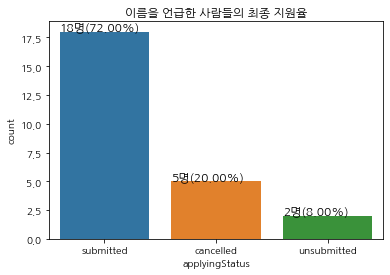

In [9]:
# 이름 언급한 사람의 지원율 
ax = sns.countplot(df[df['자소서'].str.contains('###')]['applyingStatus'])
plt.rcParams['figure.figsize'] = (5,5)
ttl = len(df[df['자소서'].str.contains('###')])
for p in ax.patches:
  ax.annotate('{:.0f}명({:.2f}%)'.format(p.get_height(), p.get_height()/ttl*100), (p.get_x(), p.get_height()+0.05), size=12)
plt.title('이름을 언급한 사람들의 최종 지원율')
plt.show();

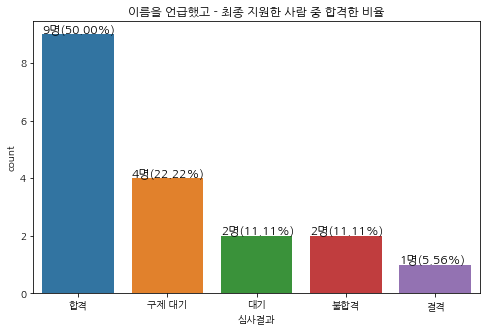

In [ ]:
# df = df.fillna('없음')
ax = sns.countplot(df[(df['자소서'].str.contains('###'))&(df['applyingStatus']=='submitted')]['심사결과'])
plt.rcParams['figure.figsize'] = (8,5)
ttl = len(df[(df['자소서'].str.contains('###'))&(df['applyingStatus']=='submitted')])
for p in ax.patches:
  ax.annotate('{:.0f}명({:.2f}%)'.format(p.get_height(), p.get_height()/ttl*100), (p.get_x(), p.get_height()+0.05), size=12)
plt.title('이름을 언급했고 - 최종 지원한 사람 중 합격한 비율')
plt.show();

# df[(df['자소서'].str.contains('###'))&(df['applyingStatus']=='submitted')]

데이터 수가 너무 적어서 큰 의미는 없을 것으로 보임  
~~~
합격, 대기 -> 합격  11명 (61%)
불합격, 결격, 구제 대기 -> 불합격 7명 (39%)
~~~


in submitted
합격, 대기  
불합격, 구제 대기, 결격  


얻고자 하는것  
코드스테이츠 지원 이유  
ai 흥미 계기  
ai 적성확인 노력 



In [31]:
df['HPC점수'].describe()

count    268.000000
mean       4.940299
std        2.036690
min        0.000000
25%        3.500000
50%        5.000000
75%        6.500000
max       10.000000
Name: HPC점수, dtype: float64

In [32]:
df['심사결과'].unique()

array(['합격', '미완료', '대기', '구제 대기', '포기', '결격', '불합격', '구제'], dtype=object)

In [10]:
# 심사결과를 bianry하게 표현
df['심사결과_binary'] = df['심사결과'].map(lambda x: 1 if (x == '합격') or (x == '대기') else 0)

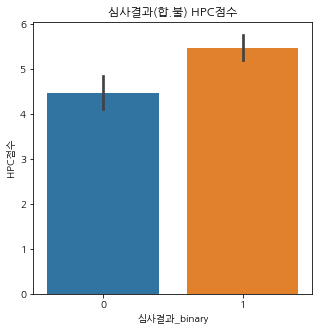

In [37]:
sns.barplot(df['심사결과_binary'], df['HPC점수'])
plt.title('심사결과(합.불) HPC점수')
plt.show();

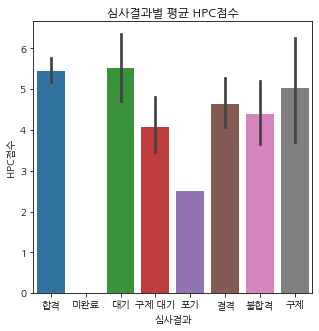

In [38]:
sns.barplot(df['심사결과'], df['HPC점수'])
plt.title('심사결과별 평균 HPC점수')
plt.show();

In [61]:
# 100단위로 자소서 길이를 파악
df['자소서길이_100'] = df['자소서길이'].map(lambda x: round(x, -2) if int(str(x)[-2:])>=50 else round(x+50,-2))

In [61]:
'1480'[-2]

'8'

In [59]:
round(1480, -2)

1500

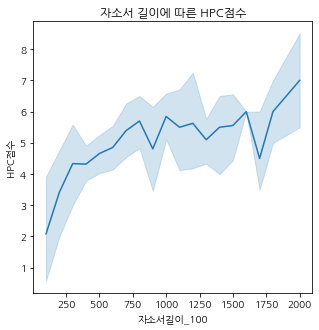

In [68]:
import math
# 자소서 길이에 따른 HPC점수 파악 
sns.lineplot(df[df['자소서길이_100']<2100]['자소서길이_100'], df['HPC점수'])
plt.title('자소서 길이에 따른 HPC점수')
plt.show();

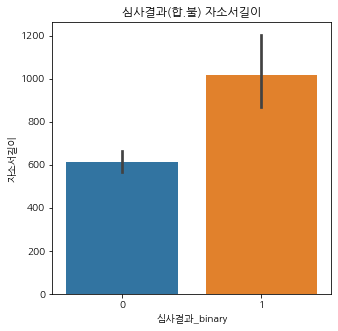

In [70]:
sns.barplot(df['심사결과_binary'], df[df['자소서길이']>1]['자소서길이'])
plt.title('심사결과(합.불) 자소서길이')
plt.show();

미완료가 문제..  

지원동기 분석 이유: 어떤 목적을 가진 사람들이 오는것인가!?  

**자소서를 쓰는 사람이 대개 서밋도 하고 합격도 한다.**
- 자소서 쓰는 사람에 대한 인구통계적 또는 그 외 정보의 특징

자소서 쓴 사람 중에서

합격 /불합격 라인 / unsubmitted 한 사람들 중에서

경력이 있으면서, 현재는 일을 안하고 있는, 대졸 이상 ref.

</br>
</br>
</br>
</br>
</br>


- AI에 관심을 가지게 된 계기
  * 앞으로 살면서 가장 유용하게 작용될 전문 기술 같아서 입니다.
- AI과 관련된 업무에 적성이 맞는지 확인하기 위해 했던 노력
  * 원래부터 컴퓨터에 관심이 많았고, AI관련된 내용들을 즐겨 찾아보았습니다.
    이번기회를 통해 직업적인 부분으로 까지 생각하고 지원을 했습니다.
- 많은 부트캠프 과정 중에 코드스테이츠를 선택한 이유
  * 광고가 제일 많이 떴고, 광고가 많다는건 그만큼 그 회사에서 자신감과 자부심이 있다고 생각했습니다.
- AI 부트캠프 과정을 통해 얻고자 하는 것
  * 취업을 통해 실무 작업을 진행해 보고싶습니다.


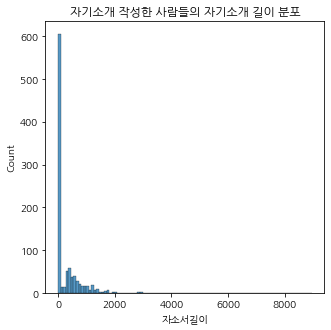

In [28]:
sns.histplot(df['자소서길이'])
plt.title('자기소개 작성한 사람들의 자기소개 길이 분포')
plt.show();

In [ ]:
df['자소서']

0      저는 E커머스 시장에 관심을 가지고 사업을 준비했었습니다. 하지만 데이터를 다룰줄 ...
1      1. AI에 관심을 가지게 된 계기\n\n1). 기계공학 / 마이크로 로봇 전공. ...
2      군 복무 시절 빅데이터와 관련된 도서를 접하고 나서 데이터 분석 분야에 관심이 생겨...
3                                                     없음
4      <인류 진화의 중심에 서고 싶다.>\n- 저는 18년간 화학공학을 연구해 온 화학공...
                             ...                        
984    저는 공대를 나와 현재 제조업에서 연구원, 해외영업직을 거쳐 신사업개발을 맡고 있습...
985    데이터에 대한 실무 경험이 부족하고, 연구를 하고 있지만 기업에서 어떤 것이 필요한...
986    친구들이 게임하는 것을 보거나 운동하는 것을 볼때 훈수 두기를 좋아했던 저는 분석하...
987    대학 전공 수업 중에 컴퓨터 공학부의 인공지능 수업을 외국인 교수님 밑에서 배우게 ...
988                                                   없음
Name: 자소서, Length: 989, dtype: object

# Text 분석


In [11]:
from konlpy.tag import Mecab
mecab = Mecab()

In [73]:
df.columns

Index(['applyingStatus', '심사결과', '마지막 단계', '성별', '거주지역', '최종학력', '학업상태',
       '잔여학점', '전공계열', '전공', '근로경험', '퇴사/휴직 계획', '근로직군', '근로기간',
       '국민내일배움카드 발급상태', '카드발급 관련메모', '국민내일배움카드 지원제한 사항', '수료 후 계획',
       '취업희망 AI 관련 포지션', '취업희망 산업도메인', '희망업무', '취업희망 회사', '데이터 직군관련 자료를 접한 시점',
       '업무 친숙도', '관련교육 경험', '교육경험 기간', '교육기간', '채용프로세스 경험시점', '취업적합성 점수',
       '학습적합성 점수', 'HPC점수', '사전과제 점수', '자소서', '자소서길이', '심사결과_binary',
       '자소서길이_100'],
      dtype='object')

In [15]:
df['심사결과'].unique()

array(['합격', '미완료', '대기', '구제 대기', '포기', '결격', '불합격', '구제'], dtype=object)

In [26]:
# 1차 불용어
stopword = ['데이터', '코드', '스테이', '부트캠프', '과정', '통해', '공부', '입니다',]

In [123]:
import re
from collections import Counter

def token_counter(df, text_pos, num, stopword):
  sentence_tag = []
  for text in df['자소서']:
    # 특수문자제거
    con = re.compile(r'[^ A-Za-z0-9가-힣+]')
    cleaned = con.sub('', text).lower()
    morphs = mecab.pos(cleaned)
    sentence_tag.append(morphs)
  container = 0
  result = []
  for sentence in sentence_tag:
    for word, tag in sentence:
      if (tag == text_pos)and (len(word) > 1) and (word not in stopword):
        result.append(word)
      # elif word == 'ai':
      #   result.append(word)
      # elif word == '빅' or word == '데이터':
      #   if container == 1:
      #     result.append('빅데이터')
      #     container = 0
      #   else:
      #     container += 1
  counts = Counter(result)
  top_keyword = counts.most_common(num) 
  return top_keyword


In [ ]:
token_counter(df, 'NNG', 100, stopword)

In [14]:
top_100 = token_counter(df, 'NNG', 100, stopword)
top_100[:10]

[('생각', 722),
 ('캠프', 591),
 ('부트', 574),
 ('분야', 491),
 ('분석', 411),
 ('관심', 404),
 ('관련', 383),
 ('지원', 372),
 ('학습', 291),
 ('기술', 278)]

In [ ]:
token_counter(df, 'NNG', 100, stopword)

In [52]:
# 2차 불용어
stopword = ['데이터','코드', '스테이', '부트캠프', '과정', '통해', '공부', '입니다', '가가','생각','캠프','부트','분야','관련','지원',
            '관심','학습','진행','부분','흥미','해당','판단','확인','교육']

In [18]:
top_100 = token_counter(df, 'NNG', 100, stopword)
top_100[:10]

[('분석', 411),
 ('기술', 278),
 ('경험', 258),
 ('전공', 255),
 ('취업', 240),
 ('러닝', 240),
 ('프로젝트', 239),
 ('사람', 234),
 ('업무', 228),
 ('수업', 221)]

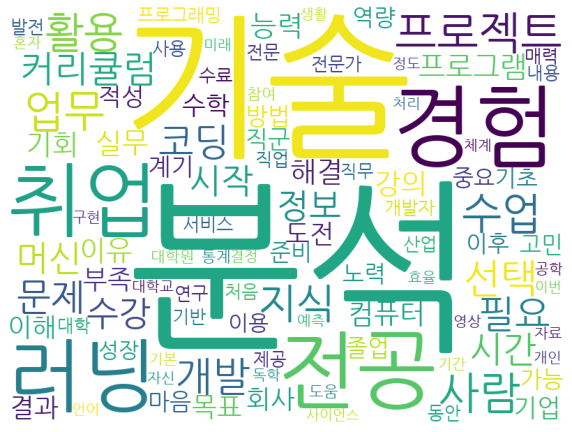

In [19]:
from wordcloud import WordCloud
from collections import Counter
wordcloud = WordCloud(font_path=font_path,background_color='white',width=800, height=600, prefer_horizontal = 1)

cloud = wordcloud.generate_from_frequencies(dict(top_100))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

* 불용어 추가
* 명상 외에 동사도 찾아볼 것
* 변수 별로 파악해볼 것
* mecab과 okt의 차이도 찾아볼 것



In [127]:
df.columns

Index(['applyingStatus', '심사결과', '마지막 단계', '성별', '거주지역', '최종학력', '학업상태',
       '잔여학점', '전공계열', '전공', '근로경험', '퇴사/휴직 계획', '근로직군', '근로기간',
       '국민내일배움카드 발급상태', '카드발급 관련메모', '국민내일배움카드 지원제한 사항', '수료 후 계획',
       '취업희망 AI 관련 포지션', '취업희망 산업도메인', '희망업무', '취업희망 회사', '데이터 직군관련 자료를 접한 시점',
       '업무 친숙도', '관련교육 경험', '교육경험 기간', '교육기간', '채용프로세스 경험시점', '취업적합성 점수',
       '학습적합성 점수', 'HPC점수', '사전과제 점수', '자소서', '자소서길이', '심사결과_binary', '자소서토큰'],
      dtype='object')

In [20]:
passed =df[df['심사결과_binary']==1]
unpassed = df[df['심사결과_binary']==0]
# uncomplited =df[df['심사결과']=='미완료']

In [46]:
passed_100 = token_counter(passed, 'NNG', 30, stopword)
unpassed_100 = token_counter(unpassed, 'NNG', 30, stopword)

In [47]:
for p_word in dict(passed_100).keys():
  if p_word in dict(unpassed_100).keys():
    stopword.append(p_word)

In [48]:
# 다시 진행
passed_100 = token_counter(passed, 'NNG', 100, stopword)
unpassed_100 = token_counter(unpassed, 'NNG', 100, stopword)

In [49]:
passed_100[:20]

[('머신', 79),
 ('능력', 71),
 ('수강', 70),
 ('해결', 64),
 ('목표', 61),
 ('이용', 57),
 ('프로그래밍', 54),
 ('컴퓨터', 54),
 ('부족', 53),
 ('연구', 51),
 ('이후', 51),
 ('서비스', 51),
 ('실무', 50),
 ('결과', 50),
 ('가능', 50),
 ('졸업', 49),
 ('전문가', 49),
 ('계기', 48),
 ('회사', 48),
 ('이해', 48)]

In [50]:
unpassed_100[:20]

[('이유', 85),
 ('실무', 79),
 ('적성', 74),
 ('직군', 72),
 ('도전', 72),
 ('컴퓨터', 71),
 ('수강', 71),
 ('머신', 66),
 ('회사', 65),
 ('수학', 65),
 ('해결', 65),
 ('결과', 63),
 ('기업', 63),
 ('이해', 61),
 ('마음', 60),
 ('전문', 59),
 ('준비', 58),
 ('부족', 57),
 ('능력', 57),
 ('목표', 57)]

In [83]:
len(df[(df['심사결과_binary']==0)&(df['자소서'].str.contains('문제'))])

53

### LDA (Latent Dirichlet Allocation)

In [72]:
' '.join([i if len(i) >1 else '' for i in mecab.nouns(df['자소서'][0])])

' 커머스 시장 관심 사업 준비 데이터  생각 데이터 분석가 직업  커리어 데이터 분석가 성장  사업 영향   의심 업무 부분 의지 때문 도전   코드 스테이  이유 취업 연계 시스템 판단 때문 원생 평가 학원  환경 마음 부트 캠프  혼자  데이터 분야 실질 업무'

In [73]:
df['자소서토큰'] = df['자소서'].map(lambda x: ' '.join([i if len(i) >1 else '' for i in mecab.nouns(x)]))

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = TfidfVectorizer(stop_words=stopword, max_features= 1000)
X = vectorizer.fit_transform(df['자소서토큰'])

In [75]:
lda_model = LatentDirichletAllocation(n_components=5,learning_method='online',random_state=777,max_iter=1)

In [76]:
lda_top = lda_model.fit_transform(X)

In [77]:
terms = vectorizer.get_feature_names()

In [78]:
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms)

Topic 1: [('업무', 2.34), ('경험', 1.72), ('누나', 1.68), ('도전', 1.54), ('인공지능', 1.43)]
Topic 2: [('인공지능', 1.49), ('기술', 1.32), ('전공', 1.29), ('이타', 1.14), ('사용', 1.14)]
Topic 3: [('분석', 15.4), ('전공', 12.78), ('기술', 11.23), ('인공지능', 10.75), ('수업', 10.09)]
Topic 4: [('러닝', 1.45), ('개발', 1.21), ('분석', 1.18), ('프로젝트', 1.1), ('투자', 1.07)]
Topic 5: [('기술', 0.97), ('광고', 0.77), ('업무', 0.74), ('내용', 0.74), ('취업', 0.74)]


In [80]:
for i in df[df['심사결과_binary']==1]['자소서']:
  print('>>>>', i, '\n')

>>>> 저는 E커머스 시장에 관심을 가지고 사업을 준비했었습니다. 하지만 데이터를 다룰줄 안다면 어떨까라는 생각을 하게 되었고 , 데이터 분석가라는 직업을  알게되었습니다. 저의 커리어를 데이터 분석가로써 다지면서 성장해 나간다면,분명히 저의 사업에 큰 영향을 끼칠수 있을것이라 믿어 의심치 않습니다. 업무 적합성에대해서는 모호한 부분이 많습니다. 하지만 하고자하는 의지가 있기 때문에 도전할것입니다. 
제가 코드스테이츠를 고른이유는
취업을 연계해주는 시스템이 잘 갖춰져 있다고 판단했기 때문입니다. 또한 원생들에 대한 평가도 다른 학원들에 비해 강한 편이라고 익히 들었습니다.이런 환경이 너무 마음에 들었습니다.
부트캠프를 통해서 얻고자 하는 것은 혼자서는 할수없는 AI,데이터 분야의 실질적인 업무에 대해 배우고 싶습니다. 

>>>> 1. AI에 관심을 가지게 된 계기

1). 기계공학 / 마이크로 로봇 전공. 그러나 커리어 전환 결심.

저는 대학 시절 때, 기계공학을 전공하였고 미적분학, 선형대수학, 공업 수학 등의 수학 과목과 역학 과목 등의 전공 과목들을 특히 좋아하였기 때문에 되게 열심히 공부하였던 것 같습니다. 그러면서 자연스럽게 대학원에서 기계나 로봇 등을 연구하고 싶은 생각이 들었고, 우연히 다큐멘터리 프로그램을 통해 마이크로 로봇에 대해 접한 후에 마이크로 로봇에 관심을 갖게 되어 대학원에 진학하게 되었습니다. 

대학원 석사 때, 저는 혈관 치료용 자기 구동 마이크로 로봇들을 연구하였고, 대학원 생활을 통해 1저자 및 공저자로 sci(e)급 논문 2편을 포함한 논문 3편, 학회 에서의 우수 논문상을 수상하였으며, 영어 논문 작성, 영어 발표 및 토론, 외국 회사와의 실험 재료 거래 등을 통해 얻은 영어 실력, 논리적이고 객관적으로 생각하는 능력 등 많은 것들을 얻을 수가 있었습니다.

그러나 저는 대학원 졸업 후에 코로나 팬데믹과 같은 여러 대외적 상황, 마이크로 로봇을 취급하는 회사의 부재 등에 의한 취업 기회의 실종, 저의 개인적인 능력 부

In [84]:
df['심사결과_binary'].value_counts()

0    862
1    127
Name: 심사결과_binary, dtype: int64

In [85]:
df['심사결과'].unique()

array(['합격', '미완료', '대기', '구제 대기', '포기', '결격', '불합격', '구제'], dtype=object)

In [100]:
data = df[((df['심사결과_binary']==0)&(df['자소서길이']>500))|df['심사결과_binary']==1]

In [ ]:
!pip install transformers

In [104]:
from transformers import TFBertModel, BertConfig, BertTokenizer
import tensorflow as tf
from tensorflow.keras.layers import Dropout

In [109]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size = 0.1, random_state=1)


In [105]:
# Config 설적을 통해 Bert base 모델 가져오기
config = BertConfig.from_pretrained('monologg/kobert')
config.output_hidden_states = False

# 토크나이저 정의 - Config를 일치시켜 같은 모델에 대한 토크나이저를 가져오기
tokenizer = BertTokenizer.from_pretrained(pretrained_model_name_or_path = 'monologg/kobert', config = config)

# Bert 모델 가져오기
transformer_model = TFBertModel.from_pretrained('monologg/kobert', config = config, from_pt=True)

Downloading:   0%|          | 0.00/352M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [111]:
bert = transformer_model.layers[0]
input_ids = tf.keras.Input(shape = (128, ), name = 'input_ids', dtype = 'int32')
inputs = {'input':input_ids}
bert_model = bert(input_ids)[1]
dropout = Dropout(config.hidden_dropout_prob, name = 'pooled_output')
pooled_output = dropout(bert_model, training=False)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer = tf.keras.initializers.TruncatedNormal(stddev=config.initializer_range), name = 'output')(pooled_output)
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'Bert_Classifier')
model.summary()

Model: "Bert_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 128)]             0         
                                                                 
 bert (TFBertMainLayer)      multiple                  92186880  
                                                                 
 pooled_output (Dropout)     (None, 768)               0         
                                                                 
 output (Dense)              (None, 1)                 769       
                                                                 
Total params: 92,187,649
Trainable params: 92,187,649
Non-trainable params: 0
_________________________________________________________________


In [113]:
%%time

# optimizer = tf.keras.optimizers.Adam(learning_rate = 5e-05,
#                                      epsilon=1e-08,
#                                      decay=0.01,
#                                      clipnorm=1.0)
loss = 'binary_crossentropy'
metric = ['accuracy']

model.compile(optimizer = 'adam', loss = loss, metrics = metric)

x= tokenizer(
    text = df_train['자소서'].to_list(),
    add_special_tokens=True,
    max_length = 128,
    truncation = True,
    padding = True,
    return_tensors='tf',
    return_token_type_ids=False,
    # returen_attention_mask=False,
    verbose = True
     
)

early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=3, restore_best_weights= True)


history = model.fit(x['input_ids'],df_train['심사결과_binary'], validation_split=0.2, epochs=10, callbacks=[early])

Epoch 1/10
6/6 [==============================] - 24s 2s/step - loss: 0.7298 - accuracy: 0.5054 - val_loss: 0.8236 - val_accuracy: 0.3617
Epoch 2/10
6/6 [==============================] - 5s 900ms/step - loss: 0.6911 - accuracy: 0.5269 - val_loss: 0.6646 - val_accuracy: 0.6383
Epoch 3/10
6/6 [==============================] - 5s 851ms/step - loss: 0.7121 - accuracy: 0.4624 - val_loss: 0.7507 - val_accuracy: 0.3617
Epoch 4/10
6/6 [==============================] - 5s 855ms/step - loss: 0.6913 - accuracy: 0.5000 - val_loss: 0.6843 - val_accuracy: 0.6383
Epoch 5/10
6/6 [==============================] - 5s 889ms/step - loss: 0.7101 - accuracy: 0.4946 - val_loss: 0.7462 - val_accuracy: 0.3617
CPU times: user 36.1 s, sys: 3.16 s, total: 39.2 s
Wall time: 1min 7s


In [119]:
bert = transformer_model.layers[0]
input_ids = tf.keras.Input(shape = (200, ), name = 'input_ids', dtype = 'int32')
inputs = {'input':input_ids}
bert_model = bert(input_ids)[1]
dropout = Dropout(config.hidden_dropout_prob, name = 'pooled_output')
pooled_output = dropout(bert_model, training=False)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer = tf.keras.initializers.TruncatedNormal(stddev=config.initializer_range), name = 'output')(pooled_output)
model1 = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'Bert_Classifier')
model1.summary()

Model: "Bert_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 200)]             0         
                                                                 
 bert (TFBertMainLayer)      multiple                  92186880  
                                                                 
 pooled_output (Dropout)     (None, 768)               0         
                                                                 
 output (Dense)              (None, 1)                 769       
                                                                 
Total params: 92,187,649
Trainable params: 92,187,649
Non-trainable params: 0
_________________________________________________________________


In [120]:

model1.compile(optimizer = 'adam', loss = loss, metrics = metric)

x= tokenizer(
    text = df_train['자소서'].to_list(),
    add_special_tokens=True,
    max_length = 200,
    truncation = True,
    padding = True,
    return_tensors='tf',
    return_token_type_ids=False,
    # returen_attention_mask=False,
    verbose = True
     
)

early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=3, restore_best_weights= True)


history = model1.fit(x['input_ids'],df_train['심사결과_binary'], validation_split=0.2, epochs=10, callbacks=[early])

Epoch 1/10
6/6 [==============================] - 27s 2s/step - loss: 0.7329 - accuracy: 0.5054 - val_loss: 0.7041 - val_accuracy: 0.3617
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 0.7043 - accuracy: 0.5376 - val_loss: 0.6905 - val_accuracy: 0.6383
Epoch 3/10
6/6 [==============================] - 8s 1s/step - loss: 0.7272 - accuracy: 0.4785 - val_loss: 0.7462 - val_accuracy: 0.3617
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 0.7367 - accuracy: 0.5376 - val_loss: 0.7356 - val_accuracy: 0.3617
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 0.7329 - accuracy: 0.4086 - val_loss: 0.6757 - val_accuracy: 0.6383
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 0.7196 - accuracy: 0.4731 - val_loss: 0.7840 - val_accuracy: 0.3617
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 0.7005 - accuracy: 0.5430 - val_loss: 0.6883 - val_accuracy: 0.6383
Epoch 8/10
6/6 [========================